# Data Fundamentals (H)
John H. Williamson -- Session 2018/2019

----
<font color="red"> Read the submission instructions at the bottom of this notebook **carefully** before submitting </font> 

**This submission must be your own work; you will have to make a Declaration of Originality on submission.**

Note that marks shown when tests pass are **provisional** and could change after grading.

In [1]:
NAME = "Lukas Rubikas" ## fill these in 
STUDENT_ID = "2351628R"  ## e.g. 2222222

---

## Lab 3: Assessed
# Scientific visualisation


### Notes
It is recommended to keep the lecture notes open while doing this lab exercise.

I recommend reading the lecture notes supplement *"Criticising Visualisations"* on Moodle as a quick reference summary. 

**This exercise is assessed**. Make sure you upload your solution by the deadline. See the notes at the bottom of this notebook for submission guidance.  This exercise is manually graded. Marks are out of 60. Each cell shows the marks available at the top (e.g. `## 5 marks`). `summarise_marks()` will not do anything in this lab, as there is no automarking.

### References
If you are stuck, the following resources are very helpful:

* [Introduction to Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)
* [Matplotlib command summary](https://matplotlib.org/api/pyplot_summary.html)




In [2]:
# Standard imports
# Make sure you run this cell!
from __future__ import print_function, division
import numpy as np  # NumPy

# make the plots look good inline
%matplotlib notebook
# Set up Matplotlib
import matplotlib as mpl   
import matplotlib.pyplot as plt
print("Everything imported OK")


Everything imported OK


## Purpose of this lab
This lab should help you:
* understand how to use Matplotlib for basic plotting tasks
* create simple, clean and correct 2D plots of two variables 
* create plots with multiple conditions
* plot basic statistics of datasets, representing uncertainty appropriately
* explicitly criticise existing visualisations and  suggest and implement concrete suggestions to improve them


# matplotlib Tutorial
We'll go through the first example from the lecture notes. You'll need to apply these ideas yourself later, so make sure you understand what happens here. This part of the lab is for information, and is not part of the assessment.

**Follow this tutorial carefully before attempting the lab exercise below**

In this example, the plotting commands are split up among notebook cells so that each step can be explained. In your code, just have all of the commands in one cell, to avoid having to scroll up and down as you make changes.

## Some data
This data is synthetic. It's a simple trigonometric function; the details don't particularly matter.

In [3]:
# a simple function, returns pulses with a shape determined by k
def pulse(x, k):
    return np.cos(x) * np.exp(np.cos(x) * k - k)

# generate an x value to be transformed
x = np.linspace(-3*np.pi, 3 * np.pi, 500)

## Figures
To begin any plotting we must create a **figure**, which is a "blank canvas" onto which we can add visualisations. **Important: the visualisation will always appear in the output of whichever cell has the `plt.figure()` call.** As a consequence, all of the commands below will affect in the output of the cell below.

When you go through the various steps below, scroll back up to this cell to see their effect. Note that usually all plotting commands go in *one* cell, so we don't end up scrolling about.

<IPython.core.display.Javascript object>


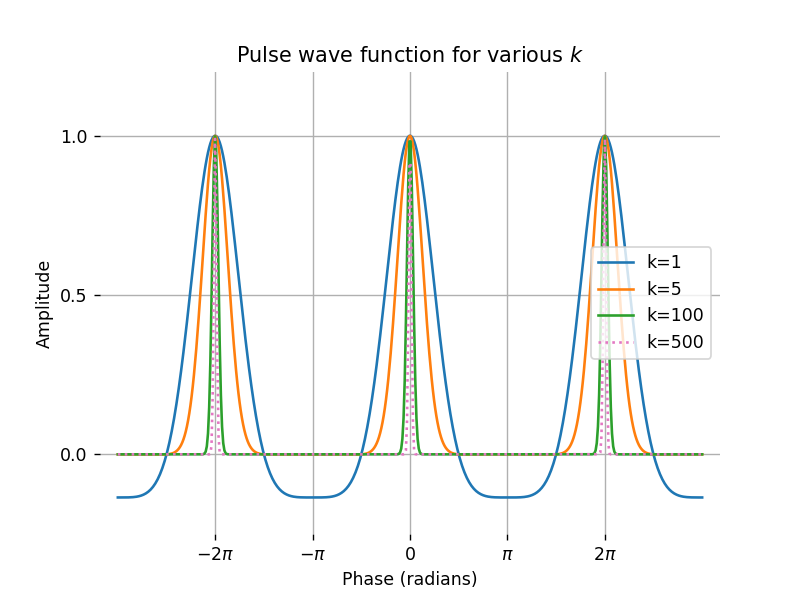

In [4]:
fig = plt.figure()  # create a new figure. It will be blank.

## If you want a different size of figure, you can use:
# fig = plt.figure(figsize=(3,3)) # quite small
# the default size set here is good for this exercise

## Axes
To draw anything, we must define **axes**. Each axes is a facet of a plot. It has a coordinate system which can be used to draw data. 

The call to create a new axis is formatted `fig.add_subplot(rows, columns, index)` which will create a subplot in a matrix of axes indexed by the index. The index increases column-wise, then row-wise, and starts from *1* (not 0!)

For example, we could create a 3x2 array of plots, and select the middle-left plot
using `plt.add_subplot(3, 2, 3)`

        --------
       | 1 | 2 |
       | 3 | 4 |
       | 5 | 6 |
       ---------

Most of the time, though, we just want one axes that fills the figure and `fig.add_subplot(1,1,1)` does that. The object it returns is what we use for all subsequent plotting.

In [5]:
ax = fig.add_subplot(1, 1, 1)  
# create a new subplot, returning a set of axes
# look above ^ ^ at the figure. You should see the axes appear


We make a line plot of `x` against `f(x, k)` for a few fixed values of `k`.
Each subsequent plot will be a new color, and all of the plots will be overlaid on the axes

`ax.plot(x,y)` is the basic line plotting command. It is called on an axes object.

Note that the `label=` gives a label that the `legend` command will use to label the graph afterwards. Always label plots if you want readers to be able to distinguish them.

In [6]:
ax.cla()  # cla means to CLear Axes. 
# it does nothing the first time we run it, but it will clear the plot and redraw if
# you run this cell multiple times. Try commenting it out and running this cell twice!


ax.plot(x, pulse(x,1), label='k=1')
ax.plot(x, pulse(x, 5), label='k=5')
ax.plot(x, pulse(x, 100), label='k=100')

# you can adjust the styling of the plot manually: 
#   here the color is black ("k") 
#   and the linestyle is dotted (":")
ax.plot(x, pulse(x, 500), label='k=500', color='C6', linestyle=':')

## note that there are several built-in colors called
# C0, C1, C2, C3, C4, C5, and C6
# they will generally look good
# try changing the 'k' above to 'C6'

**Look above to see the result**. Notice the different colouring. Repeated plots on one axis create new **layers** in the visualisation.

Now we can add **labels** to the plot. There should always be a label for the x-axis, y-axis and a title for the axes. We should also have a **legend** if multiple layers are used. `ax.legend()` will draw one. It can be configured in many ways, but the defaults are fine here.

In [7]:
# label the plot 
ax.set_xlabel("Phase (radians)")  # x-axis label
ax.set_ylabel("Amplitude")        # y-axis label
ax.set_title("Pulse wave function for various $k$")  # title of plot (appears above plot)

# create a legend (key) for the plot, using the labels specified
# in the ax.plot() calls, like ax.plot(x,y, label="xy")
ax.legend()

By default, the scaling of the axis will be adjusted to fit the data. This isn't always a good idea, so you can adjust it manually. The axis limits are set by `ax.set_xlim(min,max)` and `ax.set_ylim(min,max)` and these adjust the scaling of the axes. This configures the **coords** used to draw data.

You can try changing these to see different parts of the curve.

**Note that you don't need to call the plot commands again when you update the axis limits.**

In [8]:
## set the limits of the plot
# (if this is omitted, sensible autoscaling will be applied)
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(-0.25, 1.2)

(-0.25, 1.2)

### Tweaking
We can tweak the plot in many ways. Try some of the below.

In [9]:
# grid 
ax.grid(True) # or False to turn it off

In [10]:
# frame
ax.set_frame_on(False) # or True to turn it back on

In [11]:
ax.set_xticks([-10, -5, 0, 5, 10]) # Tick positions on the x axis
ax.set_yticks([0,0.5,1.0]) # and on the y-axis

In [12]:
# this is a fancier tick adjustment
# Tick positions on the x axis
ax.set_xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi]) 

# we can relabel the ticks using the same order. 
# LaTeX formulae work if inside $ symbols
ax.set_xticklabels(["$-2\pi$", "$-\pi$", "0", "$\pi$", "$2\pi$"])

[Text(0, 0, '$-2\\pi$'),
 Text(0, 0, '$-\\pi$'),
 Text(0, 0, '0'),
 Text(0, 0, '$\\pi$'),
 Text(0, 0, '$2\\pi$')]

The standard colours in matplotlib are shown below (you can also specify custom colours)

<IPython.core.display.Javascript object>


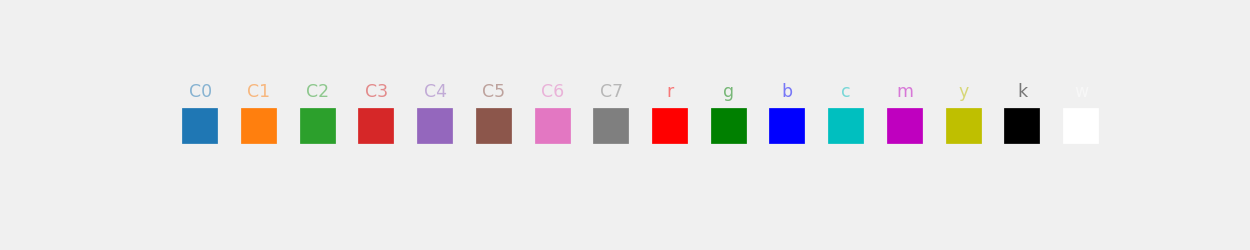

(-0.75, 15.75, 0.0, 1.0)

In [13]:
## Standard colours
fig = plt.figure(figsize=(10,2))
ax = fig.add_subplot(1,1,1)
fig.set_facecolor("#f0f0f0")  # can always use Hex colors, or floating point arrays
for i,col in enumerate(["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", 
                        "r", "g", "b", "c", "m", "y", "k", "w"]):
    
    # plot, and add some simple text
    ax.plot(i, 0.5, c=col, marker='s', markersize=20)
    # alpha sets opacity of rendering
    ax.text(i, 0.5+0.15, col, ha='center', color=col, alpha=0.5)
    
ax.set_ylim(0,1) # set axis limits    
ax.axis("off") # remove axis; there are no units to show
 
    

---------

# 1. Simple plots [30 minutes]

For these exercises, you need to plot graphs showing the data which is provided to you. To get full credit you must:
    
* choose the right kind of plot (line, scatter, bar, histogram). There may be more than one right choice.
* plot the data correctly
* make sure all the details are sensible (axes, labelling, etc.)
* **write a short caption for the data in the cell provided.**

You will get the name of the file with the data, along with a comment that explains the format of the data. You can use `np.loadtxt()` to load the datasets.

You will have to look at the lecture notes and/or the documentation to complete this exercise.


A)
* Data file: `data/cherry_trees.txt`
* Description: Height and volume of black cherry trees  measured in an orchard.
* Columns:
  
       Height (ft)  Volume (ft^3)

Note: plot your graph in **metric units**. 1 ft = 0.3048m
       
    

<IPython.core.display.Javascript object>


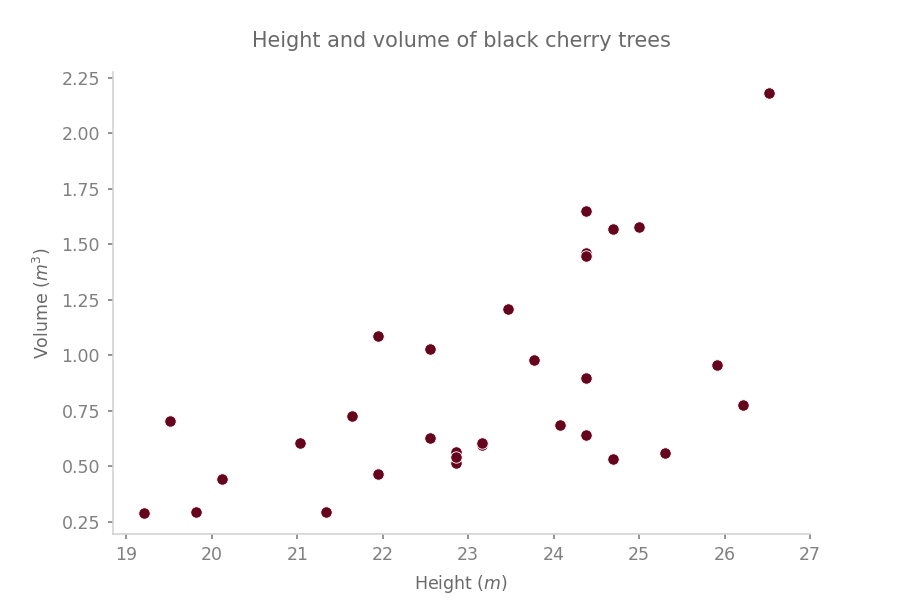

In [14]:
## 4 marks
# YOUR CODE HERE

path = 'data/cherry_trees.txt'   
cherry_trees = np.loadtxt(path, delimiter=' ')

rc = {
    'font.sans-serif': 'LiberationSans',
    'figure.titlesize': 'medium',
    'text.color': 'dimgrey',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.edgecolor': 'lightgrey',
    'axes.titlesize': 'medium',
    'axes.titlecolor': 'dimgray',
    'axes.titlepad': 12,
    'axes.labelsize': 'smaller',
    'axes.labelcolor': 'dimgray',
    'grid.color': 'lightgrey',
    'xtick.color': 'grey',
    'ytick.color': 'grey',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'xtick.major.size': 2.5,
    'ytick.major.size': 2.5,
    'legend.fontsize': 'smaller',
}


def ft_to_m(feet, degree=None):
    ratio = 0.3048
    if degree and isinstance(degree, int):
        ratio = ratio ** degree
    return ratio * feet


with plt.rc_context(rc=rc):
    fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
    ax.scatter(ft_to_m(cherry_trees[:,0]), 
               ft_to_m(cherry_trees[:,1], degree=3), 
               c='#65041d', s=30, ec='white', lw=0.4)
    ax.set_xlabel('Height ($m$)')
    ax.set_ylabel('Volume ($m^3$)')
    ax.set_title('Height and volume of black cherry trees')
    ax.set_xticks(np.arange(19, 28))

### Caption [1 mark]
**Figure 1:** Height and volume of black cherry trees measured in an orchard (data source unknown). The original measurements (in feet) are transformed to meters and cubic meters respectively. The association between the height and the volume of the trees appear to be linear. 

B)
* Data file: `data/air_passengers.txt`
* Description: The number of international air passengers, each month, 1949 to 1960.
* Columns:

      year   passenger_count


<IPython.core.display.Javascript object>


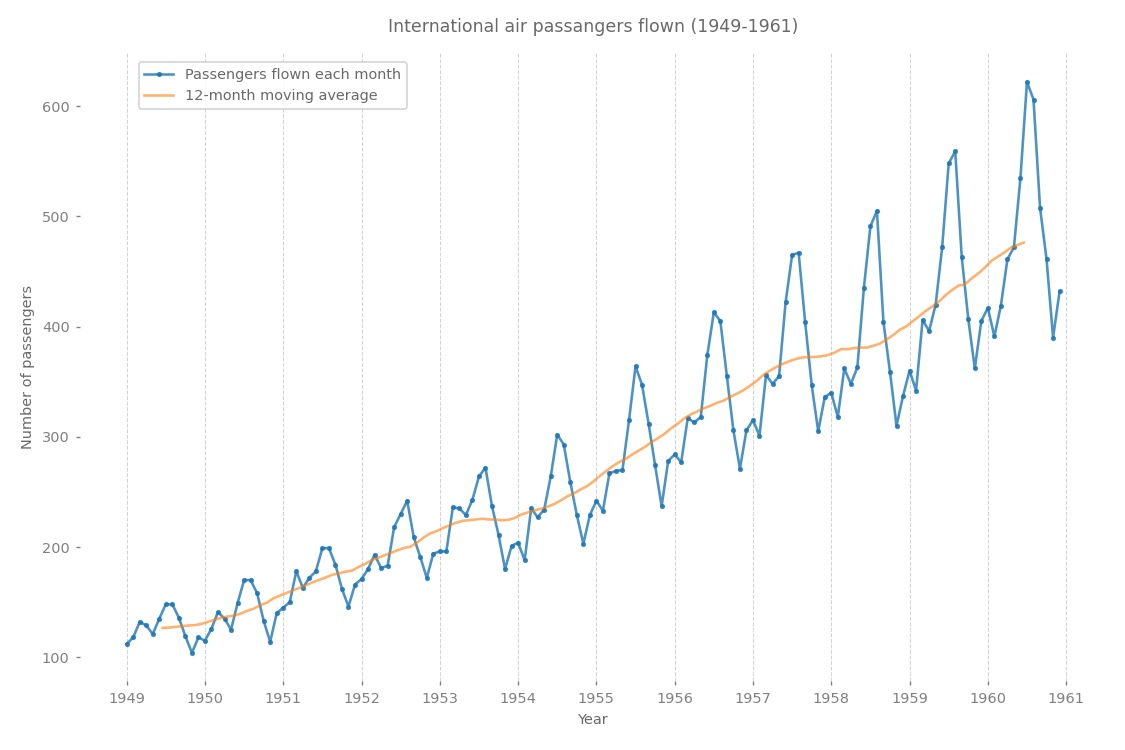

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [15]:
## 4 marks
# YOUR CODE HERE

path = 'data/air_passengers.txt'
passengers = np.loadtxt(path, delimiter=' ')

def moving_average(x, w=12):
    """ Short-hand code adapted from user yatu 
    (https://bit.ly/3gthxh4) from Stack Overflow thread 
    "How to calculate rolling / moving average using NumPy / SciPy?" 
    (https://bit.ly/37K2Lyv)
    """ 
    return np.convolve(x, np.ones(w), 'valid') / w

_rc = rc.copy()
_rc.update({'grid.linestyle':'--', 'grid.linewidth':0.6})
           
with plt.rc_context(rc=_rc):
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.plot(passengers[:,0], passengers[:,1], alpha=0.8, marker='o', ms=2,
            label='Passengers flown each month')
    ax.plot(moving_average(passengers[:,0]), moving_average(passengers[:,1]), 
            label='12-month moving average', alpha=0.6)
    ax.set_xticks(np.arange(1949, 1962))
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of passengers')
    ax.set_title('International air passangers flown (1949-1961)', size='medium')
    ax.grid(axis='x')
    ax.set_frame_on(False)
    ax.legend(loc='lower left', bbox_to_anchor=(0.05, 0.90))
    fig.tight_layout()

### Caption [1 mark]
**Figure 2:** The number of international air passengers, each month, 1949 to 1960 (data source unknown). Data follows a strong seasonal pattern, shown both in raw numbers and in running average of twelve-month periods. A clear trend of rising number of passengers flown is visible, as well as increase of variability between each seasons over the years.

C) 
* Data file: `data/rivers.txt`
* Description: Length of major rivers in the United States (miles)
* Columns:
   
       river_length



<IPython.core.display.Javascript object>


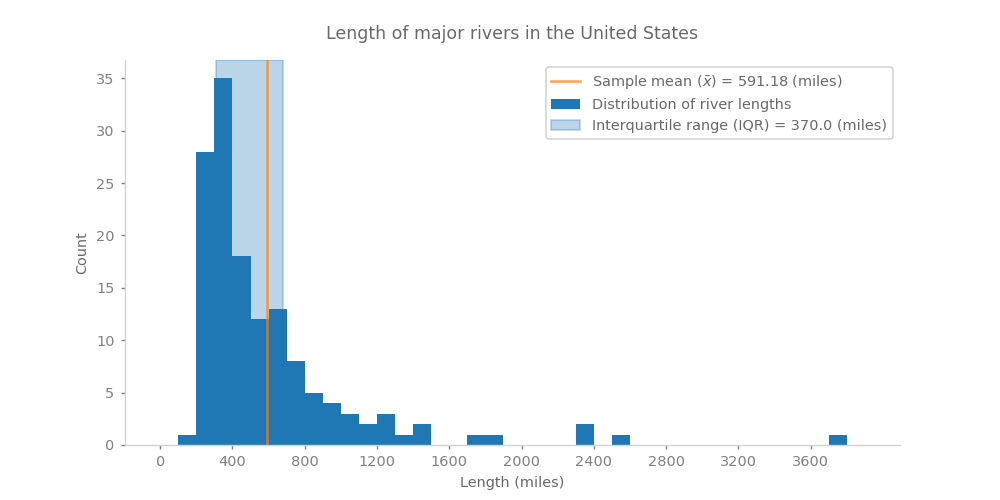

In [16]:
## 6 marks
# YOUR CODE HERE

rivers = np.loadtxt('data/rivers.txt')

with plt.rc_context(rc=rc):
    fig, ax = plt.subplots(figsize=(8, 4))
    bins = np.arange(0, 4000, 100)
    mean_length = np.mean(rivers)
    qr1 = np.quantile(rivers, 0.25)
    qr3 = np.quantile(rivers, 0.75)
    ax.hist(rivers, bins=bins, label='Distribution of river lengths')
    ax.set_xticks(bins[::4])
    ax.set_xlabel('Length (miles)')
    ax.set_ylabel('Count')
    ax.set_title('Length of major rivers in the United States')
    ax.axvline(mean_length, c='C1', alpha=0.7, 
               label=r"Sample mean ($\bar{{x}}$) = {0:.2f} (miles)".format(mean_length))
    ax.fill_between([qr1, qr3], 0, 1, step='mid', color='C0', alpha=0.3, 
                    transform=ax.get_xaxis_transform(), 
                    label='Interquartile range (IQR) = {:.1f} (miles)'.format(qr3-qr1))
    plt.legend()

### Caption [1 mark]
**Figure 3:** Length of major rivers in the United States, measured in miles (data source unknown). The distribution of lengths of major rivers in the U.S. is strongly right-skewed, with few outliers in especially long lengths (>1500 miles). The spread of the rivers in this sample are between 310 and 680 miles (IQR=370), while most of the rivers fall in `(300, 400)` length bin (mode). The mean river length is shifted towards the third quartile of lenghts and is roughly 591 miles.

# 2. Layered and faceted plots [45 minutes]

A **layered** plot has more than one set of geoms overlaid on the same coordinate system. A **faceted** plot uses multiple coordinate systems to show different views of the data.

For the dataset, appropriately use layering, faceting and reduction operations to show the dataset. 


<img src="imgs/chocolate.jpg"> <br><br>*[[Image](https://flickr.com/photos/myhsu/3146912657 "Black As Chocolate") by [myhsu](https://flickr.com/people/myhsu) shared [CC BY-ND](https://creativecommons.org/licenses/by-nd/2.0/)]*

A)
* Data file `data/cake.txt`
* Description: 
>Data on the breakage angle of chocolate cakes made with three different
recipes and baked at six different temperatures. The angle of breakage is affected by the recipe and temperature. The experiment was repeated 15 times (replicates).

* Columns:

        replicate(1-15)    recipe(0-2)    temp(deg F)    angle(deg)

Use this model:
* Facet `recipes`
* Layer `replicates`

* Colour each replicate identically, and use lowered opacity.

* As well as the layered replicates, clearly show the mean and standard deviation of the breakage angle in each facet as a line geom and a ribbon geom.

* Convert Fahrenheit to Celsius before plotting. 

* `plt.tight_layout()` will fix layout of facets. Set a super-title across all facets using `fig.suptitle()`. 

* You will need one or more `for` loops (probably) to solve this problem.
* Use Boolean arrays to perform `group by` like operations.



<IPython.core.display.Javascript object>


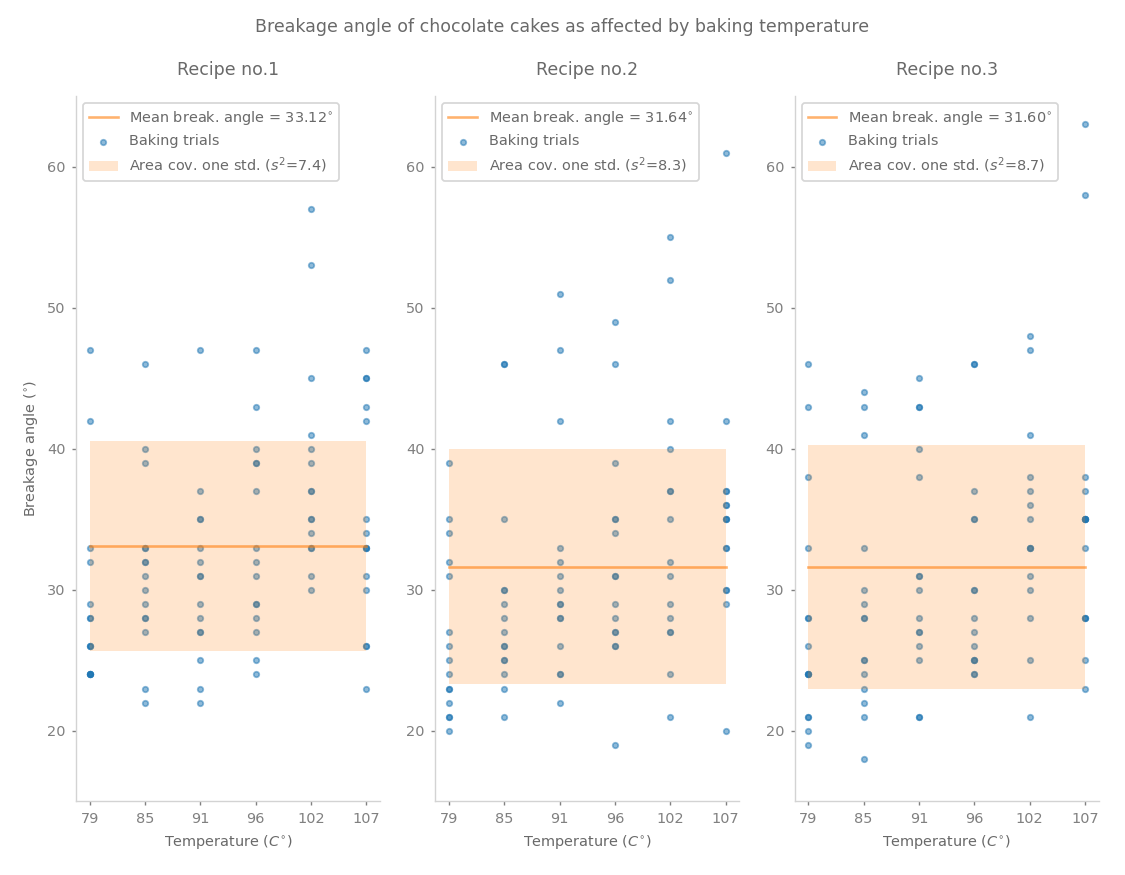

In [17]:
# 10 marks

def celsius(f):
    return 100.0 * ((f - 32) / (212-32))

# YOUR CODE HERE

cake = np.loadtxt('data/cake.txt')
temperatures = np.unique(cake[:,2])

with plt.rc_context(rc=rc):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 7))
    
    for i in range(0,3):
        recipe = cake[cake[:,1] == i]
        angle_mean = np.mean(recipe[:,3])
        angle_std = np.std(recipe[:,3])
        _ = np.ones_like(temperatures)*angle_mean
        
        ax[i].scatter(recipe[:,2], recipe[:,3], alpha=0.5, s=10, 
                      label='Baking trials')
        ax[i].plot(temperatures, _, c='C1', alpha=0.6, 
                   label='Mean break. angle = {:.2f}$^{{\circ}}$'.format(angle_mean))
        ax[i].fill_between(temperatures, y1=_ - angle_std,
                           y2=_ + angle_std, alpha=0.2,
                           label='Area cov. one std. ($s^2$={:.1f})'.format(angle_std))
        ax[i].set_xticks(temperatures)
        ax[i].set_xticklabels(['{:.0f}'.format(t) for t in celsius(temperatures)])
        ax[i].set_ylim([15,65])
        ax[i].legend(loc='upper left')
        ax[i].set_xlabel('Temperature ($C^{\circ}$)')
        ax[i].set_title('Recipe no.{}'.format(i+1))

    ax[0].set_ylabel('Breakage angle ($^{\circ}$)')
    fig.suptitle('Breakage angle of chocolate cakes as affected by baking temperature')    
    fig.tight_layout()
    fig.subplots_adjust(top=0.89)

### Caption
**Figure 4:** Data on the breakage angle of chocolate cakes made with three different recipes and baked at six different temperatures (data source unknown). The angle of breakage is affected by the recipe and temperature. The experiment was repeated 15 times for each temperature setting and each chocolate cake recipe. Mean breakage angle of cakes based on the same recipe, across all temperature settings, are also shown as well as an area within one standard deviation around the mean. We can see that recipes that produce cakes with smaller mean breakage angle also tend to have larger variation of the breakage angles across the replicates of the experiment.

# 3. Some uncertainty [30 minutes]

You are provided with data on the effect of five insecticide sprays on populations of pest insects. Compare and contrast these sprays, **appropriately representing uncertainty**.


* Data file: `data/insects.txt`
* Description: The counts of insects on each leaf of a plant in agricultural experimental units treated with
different insecticides.
* Columns:

            insect_count spray_id (0-5)


* Plot the data, on three separate figures, using:
    * A simple bar chart of the mean insect counts (grouped by spray).
    * A barchart showing the mean counts (grouped), and half a standard deviation above and below the mean. Find a way to show this interval (hint: look at the [`plt.bar` documentation](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html)). The standard deviation of an array can be computed by `np.std(x, axis)`, just like `np.mean()`.
    * A Box plot of the insect counts.

* Mark the ticks on the x axis using the names of the sprays.

        0 = Insecticator
        1 = Placebo
        2 = BuzzNoMore
        3 = Aprotex
        4 = DieOff

* For this section, you don't need to write the caption. Assume the caption is:

> Effectiveness of insecticides in a farm environment. Five different aerosol insecticides were tested.



In [18]:
# 4 marks
# load and group the data
# YOUR CODE HERE

spray_names = {
    0: 'Insecticator',
    1: 'Placebo',
    2: 'BuzzNoMore',
    3: 'Aprotex',
    4: 'DieOff'
}

spray = np.loadtxt('data/insects.txt')

insect_counts = spray[:,0].T.reshape((5,12))
insect_mean = insect_counts.mean(axis=1)
insect_std = insect_counts.std(axis=1)

(insect_mean, insect_std)

(array([14.5       , 15.33333333,  2.08333333,  4.91666667,  3.5       ]),
 array([4.51848057, 4.08928138, 1.89113429, 2.39646731, 1.6583124 ]))

<IPython.core.display.Javascript object>


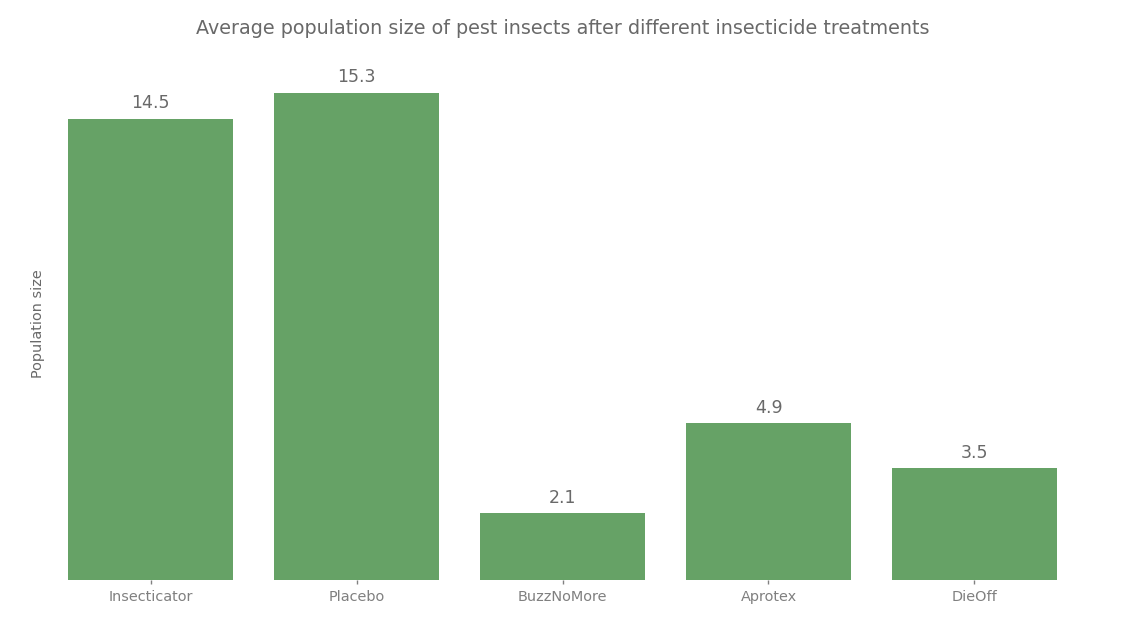

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [19]:
# 2 marks
# plot the means
# YOUR CODE HERE

with plt.rc_context(rc=rc):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.bar(spray_names.values(), insect_mean, color='darkgreen', alpha=0.6)
    for i in range(0, 5):
        ax.annotate("{:.1f}".format(insect_mean[i]), xy=(i, insect_mean[i]+0.5), 
                    ha='center', va='center')
    ax.set_frame_on(False)
    ax.tick_params(axis='y', left=False, labelleft=False)
    ax.set_ylabel('Population size', labelpad=-15, fontsize='smaller')
    ax.set_title('Average population size of pest insects after different insecticide treatments', 
                 fontsize=11, pad=20)
    fig.tight_layout()

<IPython.core.display.Javascript object>


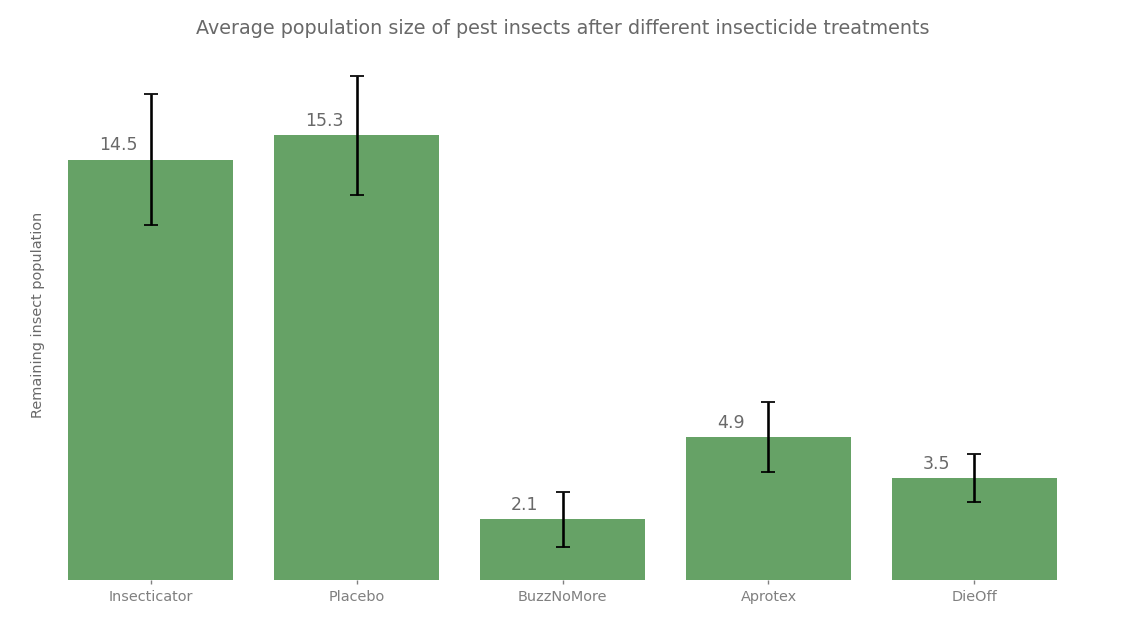

In [20]:
# 2 marks
# plot the means with std. devs.
# YOUR CODE HERE

with plt.rc_context(rc=rc):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.bar(spray_names.values(), insect_mean, color='darkgreen', alpha=0.6, 
           yerr=insect_std/2, capsize=4)
    for i in range(0, 5):
        ax.annotate("{:.1f}".format(insect_mean[i]), xy=(i-0.25, insect_mean[i]+0.5), 
                    ha='left', va='center')
    ax.set_frame_on(False)
    ax.tick_params(axis='y', left=False, labelleft=False)
    ax.set_ylabel('Remaining insect population', labelpad=-15, fontsize='smaller')
    ax.set_title('Average population size of pest insects after different insecticide treatments', 
                 fontsize=11, pad=10)
    fig.tight_layout()

<IPython.core.display.Javascript object>


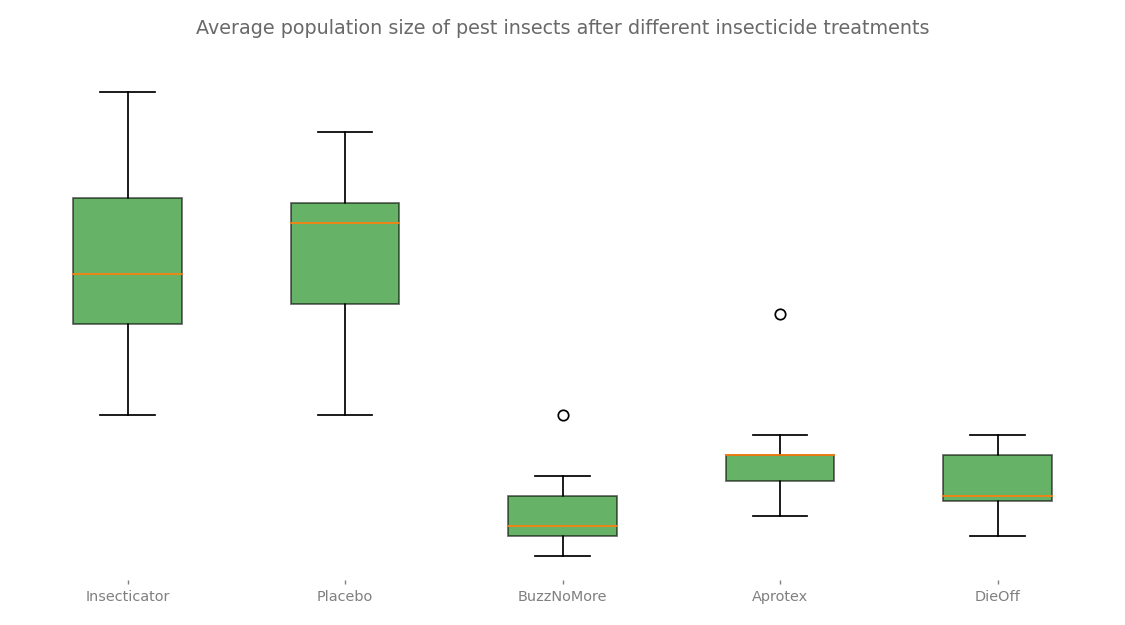

In [21]:
# 2 marks
# a Box plot
# YOUR CODE HERE

with plt.rc_context(rc=rc):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.boxplot(insect_counts.T, bootstrap=1000, patch_artist=True,
               boxprops=dict(facecolor='green', alpha=0.6))
    ax.set_xticklabels(spray_names.values())
    ax.tick_params(axis='y', left=False, labelleft=False)
    ax.set_title('Average population size of pest insects after different insecticide treatments', 
                 fontsize=11, pad=20)
    ax.set_frame_on(False)
    fig.tight_layout()

# 4. Constructively criticising visualisations [1.25 hour]
Write a short criticism of the plot below each one. Your criticism should reflect upon the scientific and aesthetic quality of the plots. You are provided with the code which generates the plots. **Copy the cell** that generates the plot and improve the flaws you found.

You criticism should be *a few bullet points* and not more. Note that you can format a bulleted list by using an asterisk at the start of a line:


    * this
    * will
    * be 
    * bulleted
    
when you edit the criticism cell.


## A: Earthquakes in California

* Dataset: Acceleration measurements at seismic stations placed around California, measuring the peak acceleration experienced during earthquakes, along with the distance of the station to the hypocenter of that earthquake.
* File: `data/cali_earthquakes.txt`
* Columns

       earthquake_id magnitude(Richter) station_id distance_to_hypocenter(km) acceleration(g) 

* Caption:

>    This plot shows the variation in acceleration at seismic monitoring stations as a function of distance to hypocentre of earthquakes in California. More distant stations measure smaller signals with some variation according to the strength of the originating earthquake.
    


<IPython.core.display.Javascript object>


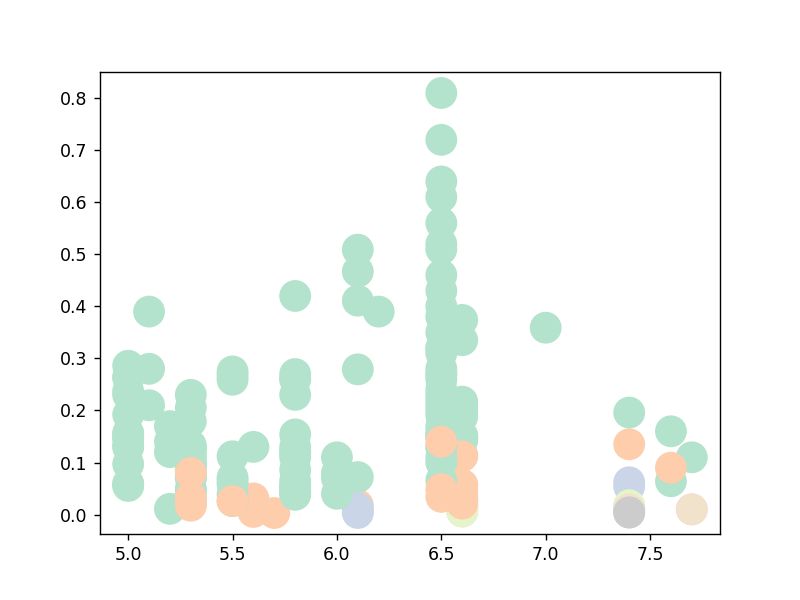

In [22]:
earthquakes = np.loadtxt("data/cali_earthquakes.txt")
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# name columns
earthquake, mag, station, distance, accel = [0,1,2,3,4]
plt.scatter(earthquakes[:,mag], earthquakes[:, accel], c=earthquakes[:, distance], cmap='Pastel2', s=300)


### Criticism [6 marks]
* There are no axis labels, no units, no legend, no colorbar and no title to distinguish what data is being plotted
* The plot doesn't show acceleration as a function of distance to hypocentre of earthquakes, as the distance is plotted as a colour rather on the x-axis
* Distance is a continuous variable but plotted as a colour using a discrete colour palette
* Sizes of point geoms are chosen inappropriately as it's difficult to discern seperate points
* There are no clear guides to support the arguments stated in the caption (difficult to pay attention to what we are supposed to see)
* Caption is written in a bit of informal style, there is no label as to which figure it's refering to.


<IPython.core.display.Javascript object>


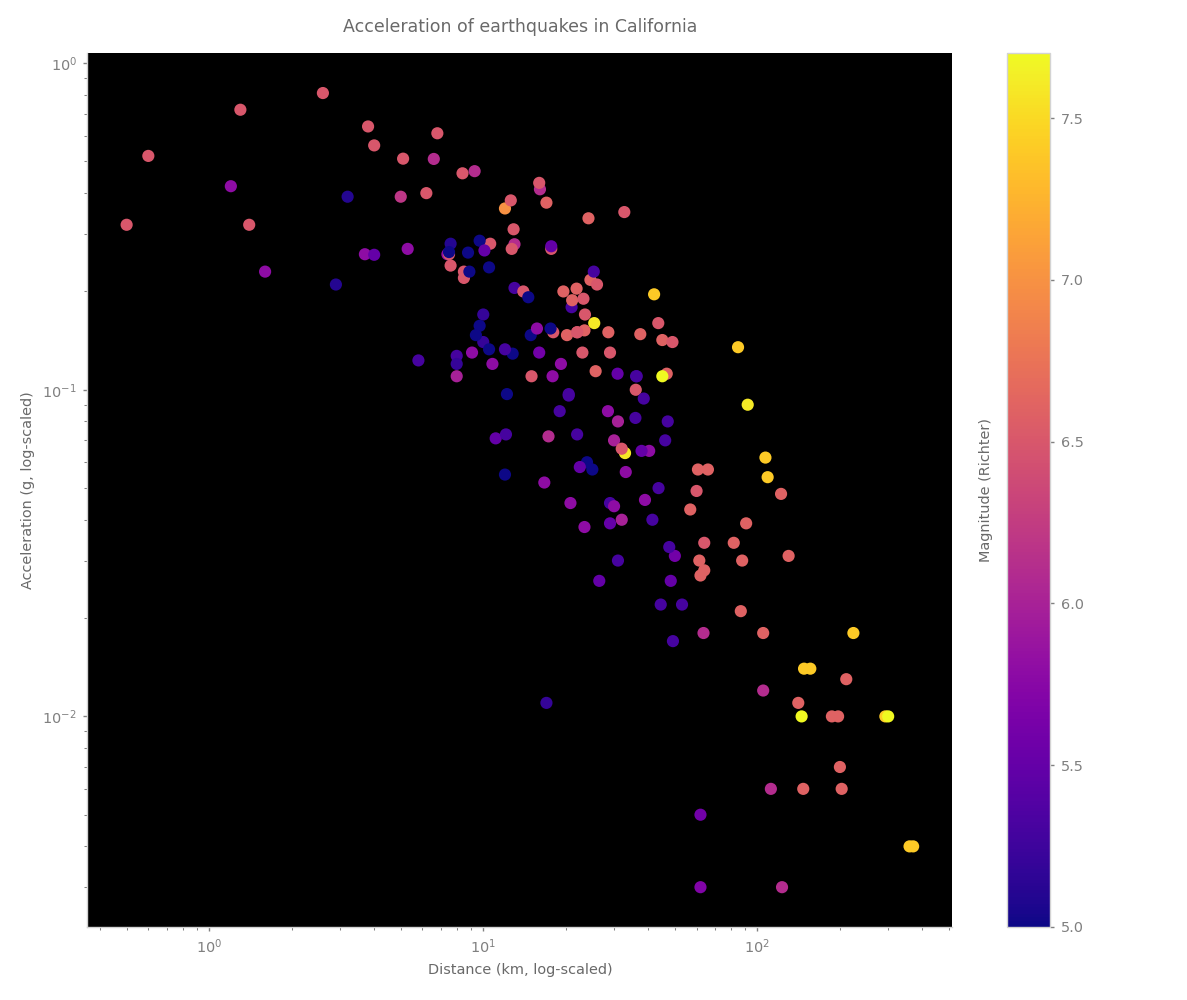

In [23]:
# 5 marks
# YOUR CODE HERE

with plt.rc_context(rc=rc):
    fig, ax = plt.subplots(figsize=(9.5, 8))

    ax.set_facecolor('black')
    mappable = ax.scatter(earthquakes[:, distance], earthquakes[:, accel], 
                          c=earthquakes[:,mag], cmap='plasma')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel('Distance (km, log-scaled)')
    ax.set_ylabel('Acceleration (g, log-scaled)')
    ax.set_title('Acceleration of earthquakes in California')
    
    cbar = fig.colorbar(mappable)
    cbar.set_label('Magnitude (Richter)', rotation=90, labelpad=-60)
    fig.tight_layout()

**Figure 6:** Variation in acceleration at seismic monitoring stations as a function of distance to hypocentre of earthquakes in California. More distant stations measure smaller signals with some variation according to the strength of the originating earthquake.

## B: Reaction times and sleep

* Dataset: The average reaction time per day for subjects in a sleep deprivation study. On day 0 the subjects had their normal amount of sleep. Starting that night they were restricted to 3 hours of sleep per night. The observations represent the average reaction time on a series of tests given each day to each subject.

* File `data/sleep_study.txt`
* Columns

         reaction time (ms)    sleep_deprivation (days)  subject_id (id)

* Caption:
> This plot shows how visual reaction time varies as subjects are deprived of sleep. Up to 10 days of sleep deprivation were tested.
    


<IPython.core.display.Javascript object>


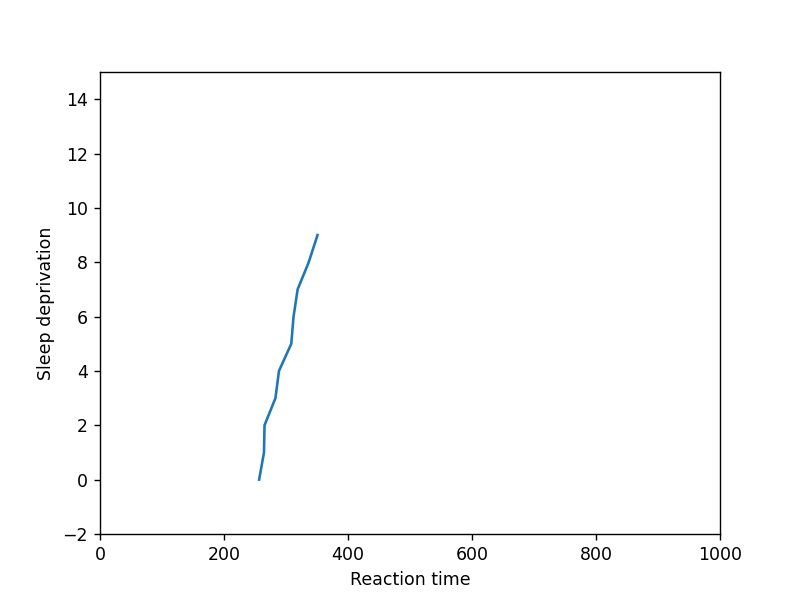

Text(0.5, 0, 'Reaction time')

In [24]:
sleep_study = np.loadtxt("data/sleep_study.txt")
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
reaction, sleep, subject = 0,1,2

# group each day
grouped =np.array([sleep_study[sleep_study[:,sleep]==i] for i in range(10)])
# take mean for each day and plot it
mean_reactions = np.mean(grouped, axis=1)[:,0] 
ax.plot(mean_reactions, np.arange(10))

# adjust axes
ax.set_xlim(0,1000)
ax.set_ylim(-2, 15)

ax.set_ylabel("Sleep deprivation")
ax.set_xlabel("Reaction time")

## Criticism [6 marks]
* Axes are scalled badly - it is impossible to see the intricacies of the trend. Y-axis even extends to negative values
* The position of the dependent variable (Reaction time) and the control variable (Sleep deprivation) are mixed up.
* Axis label contains no units to tell how reaction time and sleep deprivation is measured.
* If it's chosen to group all participants in the study and calculate a statistic (in this example, mean) on the independent variable (in this case - sleep deprivation), the plot should report the variation of the dependent variable in some form as well (standard deviation, confidence interval, standard error, etc.)
* Line plot may be is inappropriate as the independant variable (sleep deprivation, in hours) is discrete.
* Caption is incorrect - up to 9 days of sleep deprivation were studied, as on the first day the subjects got a normal amount of sleep

<IPython.core.display.Javascript object>


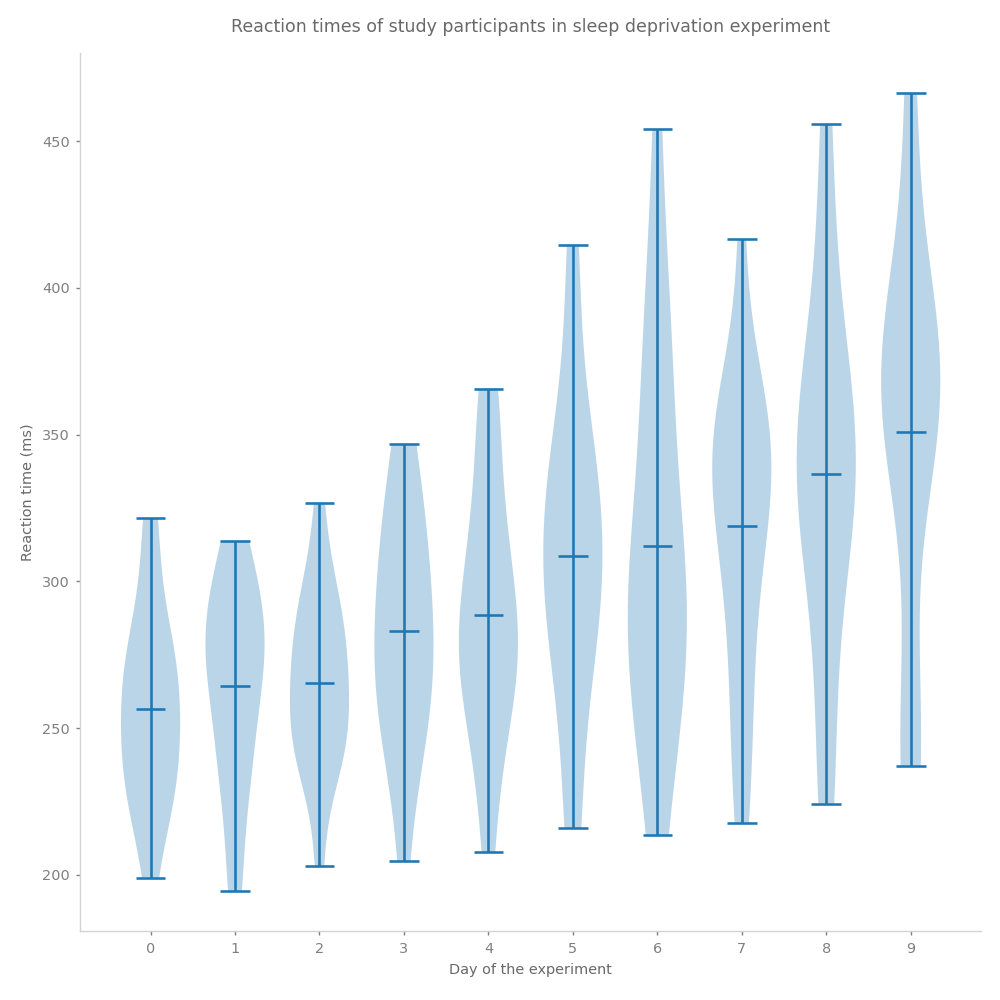

In [25]:
# 6 marks
# YOUR CODE HERE

days = np.arange(0, 10)
days_slept_slice = lambda days: sleep_study[sleep_study[:, sleep] == days]

with plt.rc_context(rc=rc):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.violinplot([days_slept_slice(i)[:, reaction] for i in days], positions=days, 
                  widths=0.7, showmeans=True, showextrema=True, points=1000)
    ax.set_xticks(days)
    ax.set_xlabel('Day of the experiment')
    ax.set_ylabel('Reaction time (ms)')
    ax.set_title('Reaction times of study participants in sleep deprivation experiment')
    fig.tight_layout()

**Figure 7:** The average reaction time per day for subjects in a sleep deprivation study. On day 0 the subjects had their normal amount of sleep. Starting that night they were restricted to 3 hours of sleep per night. The observations represent the average reaction time on a series of tests given each day to each subject. The horizontal dash in the middle of the violin plots represent the mean reaction time across all study participants during that day. We can see that as the days of the study goes on, the accumulated sleep deprivation (3 hours per night, starting after day 0 when the baseline was measured) manifests in increase of both mean reaction time as well as varience of the reaction times across study participants.

-----

# Submission instructions

### Checking your work
## Mark summary
You should check the marks you've got before submitting. To do this, 
* Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and matriculation number at the top.
* SAVE THE NOTEBOOK, 
* Go to `Cell/Restart and Run All` in the menu.
* Check the output of the cell here.

Note that this is an estimated mark, and if you don't do the above procedure *carefully* you may get nonsense estimates.


In [26]:
# summarise_marks()

### Formatting the submission
* **WARNING**: If you do not submit the correct file, you will not get any marks.
* Submit this file **only** on Moodle. It will be named `week_<xxx>.ipynb`.


## Penalties (only for assessed labs)
<font color="red">
    
**Malformatted submissions**
</font>
These assignments are processed with an automatic tool; failure to follow instructions *precisely* will lead to you automatically losing two bands in grade regardless of whether the work is correct (not to mention a long delay in getting your work back). **If you submit a file without your work in it, it will be marked and you will get 0 marks.**

<font color="red">**Late submission**</font>
Be aware that there is a two band penalty for every *day* of late submission, starting the moment of the deadline.

<font color="red">
    
**Plagiarism**
</font> Any form of plagiarism will be subject to the Plagiarism Policy. The penalties are severe.